# 1. Com relação ao agrupamento de dados, podemos afirmar:
Questão 1 Resposta  
**a.O agrupamento apresenta um certo nível de subjetividade que depende do critério usado para definir os clusters.**  
b.A classe dos objetos precisa ser conhecida.  
c.Só podemos usar medidas de similaridade para fazer o agrupamento.  
d.O agrupamento de dados é um método semi-supervisinado.  
e.O método k-means é similar ao método k-vizinhos.  

# 2. Com relação ao método k-means selecione a alternativa correta:
Questão 2 Resposta  
**a.O algoritmo é bastante simples, mas é sensível à posição inicial das sementes.**  
b.O algoritmo é extremamente caro em termos computacionais.  
c.Não é susceptível a problemas quando clusters são de diferentes densidades.  
d.Não é susceptível a problemas quando clusters são de diferentes formatos (em geral não globulares).  
e.O algoritmo é ótimo com relação à minimização do erro na classificação.

# 3. A avaliação de agrupamentos é importante:
Questão 3 Resposta  
a.Para evitar overfitting na classificação.  
b.Para comparar diferentes métodos de agrupamento e identificar outliers.  
c.Para avaliar o erro no ajuste do modelo preditivo.  
**d.Para evitar encontrar padrões em ruídos, comparar diferentes métodos de agrupamento e comparar clusters.**  
e.Para determinar qual método de classificação é o mais adequado.

# 4. Considere os dados gerados pelo código abaixo. Usando o método k-means e a medida normalized mutual information, determine o número ideal de clusters para os dados abaixo. Veja o exemplo da aula.

```python
from sklearn.datasets import make_blobs  
from sklearn.cluster import KMeans  
import numpy as np  
np.random.seed(201)  
  
import numpy as np  
import matplotlib.pyplot as plt  


c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]  
n=300  
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=1, random_state=50)  
X = data[0]  
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)  
plt.show(True)
```

Escolha uma:  
Questão 4 Resposta  
a.6  
b.2  
**c.4**  
d.1  
e.7

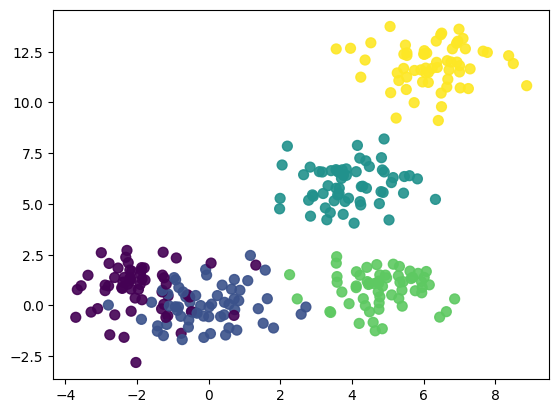

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(201)

import numpy as np
import matplotlib.pyplot as plt
# create blobs
c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]
n=300
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=1, random_state=50)
X = data[0]
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

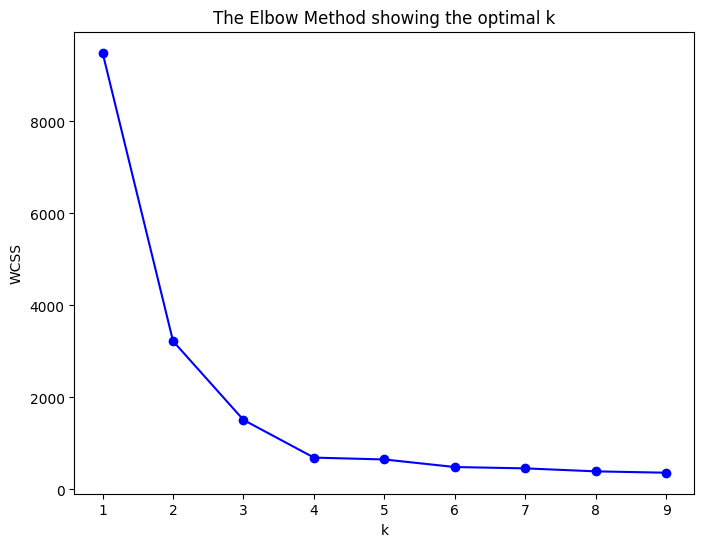

In [2]:
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

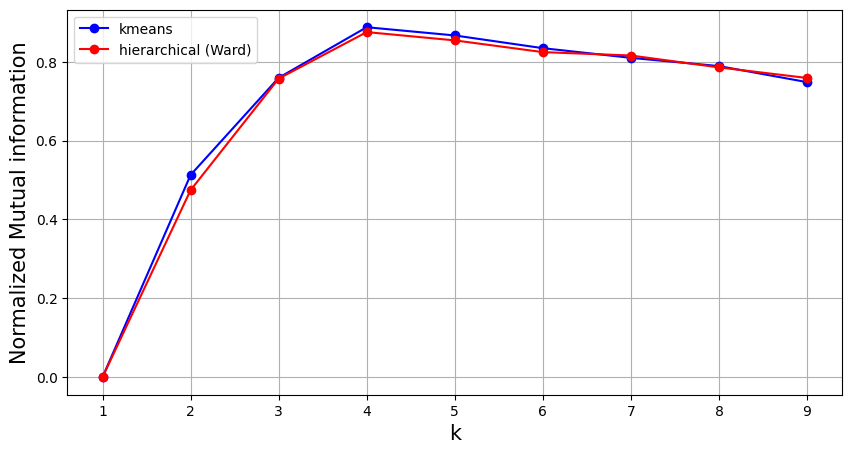

In [3]:
from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.cluster import AgglomerativeClustering 


NMI_km = []
NMI_hr = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr.append(normalized_mutual_info_score(y_hr, data[1], average_method='arithmetic'))
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.plot(K, NMI_hr, '-ro', label = 'hierarchical (Ward)')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()